# Swiggy All Menus Dataset in India :


In [1]:
# Importing all the necessary Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('swiggy_all_menus_india.csv')
df.head()

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0


In [3]:
df.shape

(197430, 9)

In [4]:
df.info() # checking the dtypes and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197430 entries, 0 to 197429
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   State            197430 non-null  object 
 1   City             197430 non-null  object 
 2   Restaurant Name  197430 non-null  object 
 3   Location         197430 non-null  object 
 4   Category         197430 non-null  object 
 5   Dish Name        197430 non-null  object 
 6   Price (INR)      197430 non-null  float64
 7   Rating           197430 non-null  float64
 8   Rating Count     197430 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 13.6+ MB


In [5]:
df.columns

Index(['State', 'City', 'Restaurant Name', 'Location', 'Category', 'Dish Name',
       'Price (INR)', 'Rating', 'Rating Count'],
      dtype='object')

In [6]:
df.isna().sum() # checking for missing values

State              0
City               0
Restaurant Name    0
Location           0
Category           0
Dish Name          0
Price (INR)        0
Rating             0
Rating Count       0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(6104)

In [8]:
df[df.duplicated(keep=False)].sort_values(list(df.columns)) # It shows only the repeated rows in the DataFrame, arranged in a clean order so duplicates are easy to see together.

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
81378,Delhi,New Delhi,Mr Bhatura,Raj Nagar,Recommended,Chole Chawal With Spl. Palak Paneer,179.0,4.8,9
81398,Delhi,New Delhi,Mr Bhatura,Raj Nagar,Recommended,Chole Chawal With Spl. Palak Paneer,179.0,4.8,9
81379,Delhi,New Delhi,Mr Bhatura,Raj Nagar,Recommended,Chole Rice,149.0,3.8,7
81399,Delhi,New Delhi,Mr Bhatura,Raj Nagar,Recommended,Chole Rice,149.0,3.8,7
81377,Delhi,New Delhi,Mr Bhatura,Raj Nagar,Recommended,Kadhi Pakoda Rice,179.0,4.8,12
...,...,...,...,...,...,...,...,...,...
91612,West Bengal,Kolkata,Wow! Kulfi,Behala,Stick Kulfi Large,Shahi Gulab Stick Kulfi Large,99.0,4.7,5
37283,West Bengal,Kolkata,Wow! Kulfi,Behala,Stick Kulfi Large,Three In One Stick Kulfi Large,99.0,4.9,8
91614,West Bengal,Kolkata,Wow! Kulfi,Behala,Stick Kulfi Large,Three In One Stick Kulfi Large,99.0,4.9,8
37279,West Bengal,Kolkata,Wow! Kulfi,Behala,Stick Kulfi Regular,Stick Kulfi Malai Regular,69.0,4.7,1


In [9]:
df.drop_duplicates(inplace=True) # droping duplicates

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape # checking the shape after removing the duplicates

(191326, 9)

### Standardizing categorical values

In [12]:
df.columns

Index(['State', 'City', 'Restaurant Name', 'Location', 'Category', 'Dish Name',
       'Price (INR)', 'Rating', 'Rating Count'],
      dtype='object')

In [13]:
cat_cols=df.select_dtypes(exclude=np.number).columns # sorting out categorical columns
cat_cols

Index(['State', 'City', 'Restaurant Name', 'Location', 'Category',
       'Dish Name'],
      dtype='object')

In [14]:
df[cat_cols]=df[cat_cols].apply(lambda x:x.str.replace(r'\s+', ' ', regex=True).str.strip().str.title()) # standardizing all the categorical columns at once.

In [15]:
df['State'].unique() # Checking wether the standardization worked or not.

array(['Karnataka', 'Maharashtra', 'Tamil Nadu', 'Delhi', 'Telangana',
       'West Bengal', 'Gujarat', 'Rajasthan', 'Uttar Pradesh', 'Punjab',
       'Madhya Pradesh', 'Bihar', 'Odisha', 'Haryana', 'Kerala',
       'Jharkhand', 'Assam', 'Chhattisgarh', 'Uttarakhand',
       'Himachal Pradesh', 'Goa', 'Jammu And Kashmir', 'Tripura',
       'Manipur', 'Meghalaya', 'Nagaland', 'Mizoram', 'Sikkim'],
      dtype=object)

In [16]:
df['City'].unique()

array(['Bengaluru', 'Mumbai', 'Chennai', 'New Delhi', 'Hyderabad',
       'Kolkata', 'Ahmedabad', 'Jaipur', 'Lucknow', 'Chandigarh',
       'Indore', 'Patna', 'Bhubaneswar', 'Gurgaon', 'Kochi', 'Ranchi',
       'Guwahati', 'Raipur', 'Dehradun', 'Shimla', 'Panaji', 'Srinagar',
       'Agartala', 'Imphal', 'Shillong', 'Kohima', 'Aizawl', 'Gangtok'],
      dtype=object)

In [17]:
df['Restaurant Name'].nunique()

984

In [18]:
df['Location'].nunique()

940

In [19]:
df['Category'].nunique()

4716

In [20]:
df['Dish Name'].nunique()

53722

### Handling Outliers

In [21]:
df.head() 

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200Gm,133.9,0.0,0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0


### Visualizing outliers using boxplot.

<Axes: >

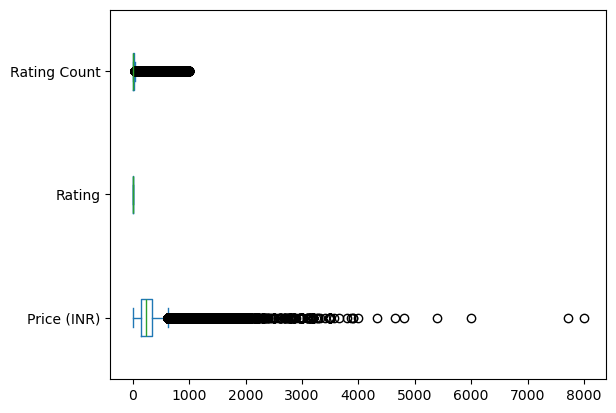

In [22]:
df.plot(kind='box',vert=False) 

### Handling Outliers in Price Column

In [23]:
df['Price (INR)'].min() 

0.95

In [24]:
df['Price (INR)'].max() 

8000.0

In [25]:
q1,q2,q3=np.percentile(df['Price (INR)'],[25,50,75])
q1,q2,q3

(np.float64(139.0), np.float64(229.0), np.float64(329.0))

In [26]:
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR
lower_fence,upper_fence

(np.float64(-146.0), np.float64(614.0))

In [27]:
outliers=df[(df['Price (INR)']<lower_fence) | (df['Price (INR)']>upper_fence)]
outliers

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
563,Karnataka,Bengaluru,Pizza Hut,Kanakapura Road,Recommended,Bold Bbq Veggie Thin N Crispy,749.00,4.6,7
592,Karnataka,Bengaluru,Pizza Hut,Kanakapura Road,Thin N Crispy Pizzas,Bold Bbq Veggie Thin N Crispy,749.00,4.6,7
593,Karnataka,Bengaluru,Pizza Hut,Kanakapura Road,Thin N Crispy Pizzas,Tandoori Paneer Thin N Crispy,749.00,5.0,6
594,Karnataka,Bengaluru,Pizza Hut,Kanakapura Road,Thin N Crispy Pizzas,Mexican Fiesta Thin N Crispy,749.00,3.8,1
595,Karnataka,Bengaluru,Pizza Hut,Kanakapura Road,Thin N Crispy Pizzas,Dhabe Da Keema Thin N Crispy,749.00,0.0,0
...,...,...,...,...,...,...,...,...,...
197116,Sikkim,Gangtok,Domino'S Pizza,District Court,Value Meals,Ultimate Cheese Burst Deluxe Combo (N Veg),815.00,0.0,0
197117,Sikkim,Gangtok,Domino'S Pizza,District Court,Value Meals,Ultimate Cheese Burst Premium Combo (Veg),931.00,0.0,0
197118,Sikkim,Gangtok,Domino'S Pizza,District Court,Value Meals,Meal For 4: Veg Cheesy Pizza,891.00,0.0,0
197120,Sikkim,Gangtok,Domino'S Pizza,District Court,Value Meals,Meal For 2: Veg Paradise & Farmhouse,667.14,0.0,0


In [28]:
(len(outliers)/len(df))*100 # outliers percentage from price column

4.9737097937551615

### Capping The outliers in Price column to `lower=20` as 0/- items practically wont present, and `upper=upper_fence` of the Price Column.

In [29]:
df['Price (INR)']=df['Price (INR)'].clip(lower=20,upper=upper_fence)
df['Price (INR)'].min(),df['Price (INR)'].max()

(20.0, 614.0)

<Axes: >

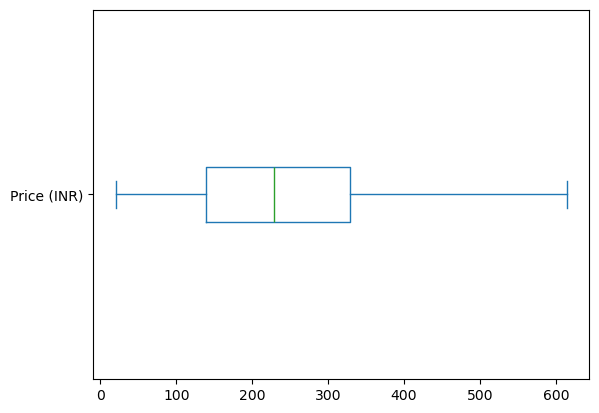

In [30]:
df['Price (INR)'].plot(kind='box',vert=False)

In [31]:
df.describe(percentiles=[0.05,0.10,0.15,0.20,0.25,0.5,0.75,0.8,0.85,0.90,0.95]).T 

,count,mean,std,min,5%,10%,15%,20%,25%,50%,75%,80%,85%,90%,95%,max
Price (INR),191326.0,252.109368,146.335302,20.0,60.0,89.0,105.0,120.0,139.0,229.0,329.0,359.0,399.0,458.0,610.0,614.0
Rating,191326.0,2.607342,2.146412,0.0,0.0,0.0,0.0,0.0,0.0,3.9,4.5,4.6,4.7,4.8,4.9,5.0
Rating Count,191326.0,28.442601,88.028100,0.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,23.0,37.0,64.0,140.0,999.0


### Handling Outliers in Rating Count Column

In [32]:
df['Rating Count'].min(),df['Rating Count'].max()

(0, 999)

In [33]:
upper_fence=df['Rating Count'].quantile(0.99)

outliers_rc=df[df['Rating Count']>upper_fence]
outliers_rc

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
851,Karnataka,Bengaluru,Kfc,Kengeri,Burgers,Chicken Zinger Burger - Classic,209.00,4.6,712
893,Karnataka,Bengaluru,Kfc,Kengeri,Hot & Crispy Chicken & Wings,Hot Chicken Wings - 4 Pcs,185.00,4.4,793
895,Karnataka,Bengaluru,Kfc,Kengeri,Boneless Chicken Popcorn,Chicken Popcorn - Large,249.00,4.5,493
896,Karnataka,Bengaluru,Kfc,Kengeri,Boneless Chicken Popcorn,Chicken Popcorn - Medium,199.00,4.5,818
923,Karnataka,Bengaluru,Kfc,Kengeri,Sides And Dips,French Fries - Large,139.00,4.4,583
...,...,...,...,...,...,...,...,...,...
188667,Meghalaya,Shillong,Kfc,Police Bazaar,Sides And Dips,French Fries - Large,155.68,4.3,514
188668,Meghalaya,Shillong,Kfc,Police Bazaar,Sides And Dips,French Fries - Medium,99.00,4.4,526
188765,Meghalaya,Shillong,Indiana Restaurant,Police Bazar,Biryani,Chicken Biryani,299.00,4.3,746
190896,Nagaland,Kohima,Kfc,Kohima Locality,Epic Savings Bucket For 3-4 (Up To 32% Off),Ultimate Savings Chicken Bucket,614.00,4.3,537


In [34]:
(len(outliers_rc)/len(df))*100 ## Percentage of Outliers

0.9982961019411895

### Capping The outliers in Rating Count column to `upper = 99 Percentile of the values` and unchanged the lower_fence as `No/0 ratings items do exist`.

In [35]:
df['Rating Count']=df['Rating Count'].clip(lower=0,upper=upper_fence)
df['Rating Count'].min(),df['Rating Count'].max()

(0, 487)

In [36]:
df.describe(percentiles=[0.05,0.10,0.15,0.20,0.25,0.5,0.75,0.8,0.85,0.90,0.95]).T #

,count,mean,std,min,5%,10%,15%,20%,25%,50%,75%,80%,85%,90%,95%,max
Price (INR),191326.0,252.109368,146.335302,20.0,60.0,89.0,105.0,120.0,139.0,229.0,329.0,359.0,399.0,458.0,610.0,614.0
Rating,191326.0,2.607342,2.146412,0.0,0.0,0.0,0.0,0.0,0.0,3.9,4.5,4.6,4.7,4.8,4.9,5.0
Rating Count,191326.0,26.418804,72.653983,0.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,23.0,37.0,64.0,140.0,487.0


<Axes: >

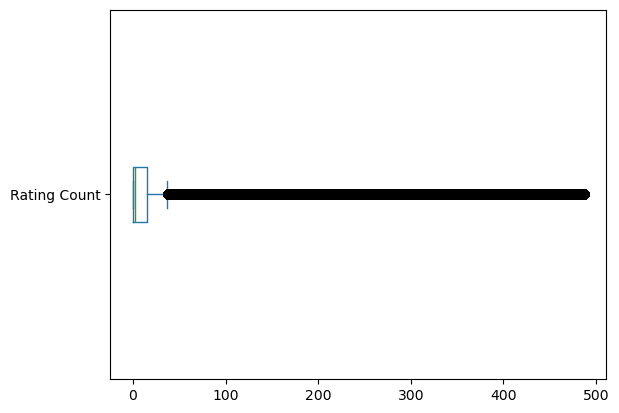

In [37]:
df['Rating Count'].plot(kind='box',vert=False) # No need to worry about the visual outliers in the box plot as the column holds the values in such a way.

In [38]:
df.shape

(191326, 9)

### `Ploting the Columns for Better Analysis:`

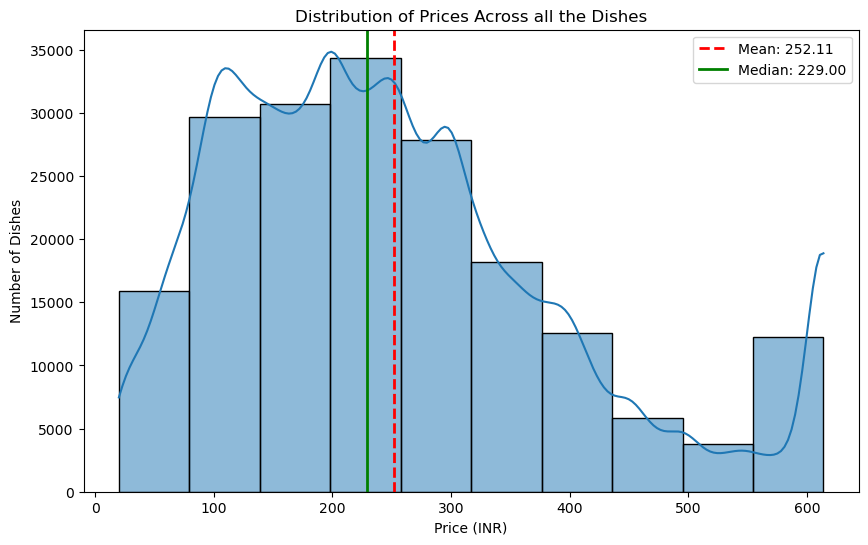

In [39]:
#  "Price (INR)" Column Analysis.

# Setting figure size and ploting the values
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Price (INR)',bins=10,edgecolor='k',kde=True) # Included KDE to see the skewness of the Prices

# Finding mean and median of the price column to show it on the plot with the help of axvline.
mean_price=df['Price (INR)'].mean()
median_price=df['Price (INR)'].median()

plt.axvline(mean_price,linewidth=2,linestyle='--',color='r',label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price,linewidth=2,linestyle='-',color='g',label=f'Median: {median_price:.2f}')

# Labels
plt.title('Distribution of Prices Across all the Dishes')
plt.ylabel('Number of Dishes')
plt.legend()

plt.show()

**We can Observe Most of the Items fall under 500/- price range and few premium items reach above 600/-**

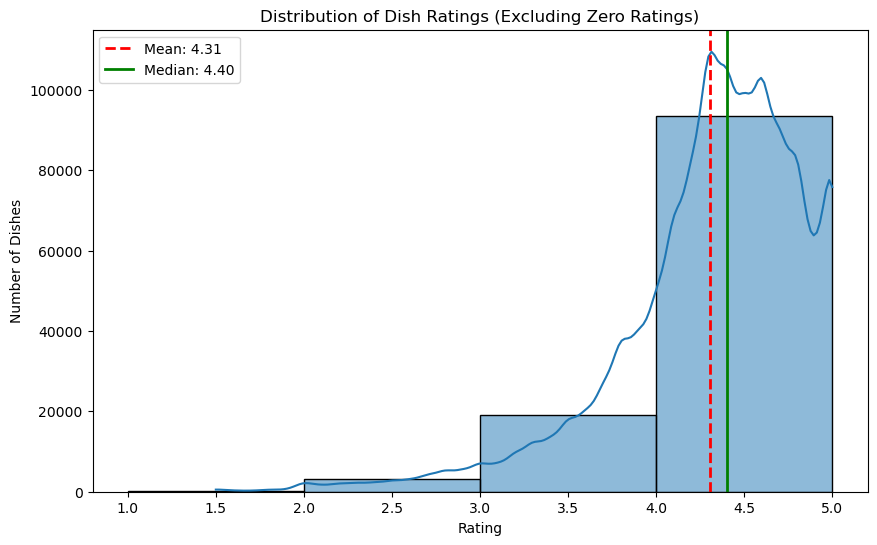

In [40]:
## Rating column analysis

# Filtering out unrated dishes (Rating = 0)
df_filtered = df[df['Rating'] > 0]

plt.figure(figsize=(10,6))

# Defining bins for clear separation of star ratings
bins = [1, 2, 3, 4, 5]

sns.histplot(df_filtered['Rating'], bins=bins, edgecolor='black',kde=True)

# Adding mean and median reference lines
mean_rating = df_filtered['Rating'].mean()
median_rating = df_filtered['Rating'].median()

plt.axvline(mean_rating, linestyle='--', linewidth=2, label=f'Mean: {mean_rating:.2f}',color='r')
plt.axvline(median_rating, linestyle='-', linewidth=2, label=f'Median: {median_rating:.2f}',color='g')

# Labels and title
plt.ylabel('Number of Dishes')
plt.title('Distribution of Dish Ratings (Excluding Zero Ratings)')
plt.legend()

plt.show()


**We can observe that the Ratings are left skewed with most of the ratings fall under 4.0-5. which shows that most of the items satisfy the customer expectations.**

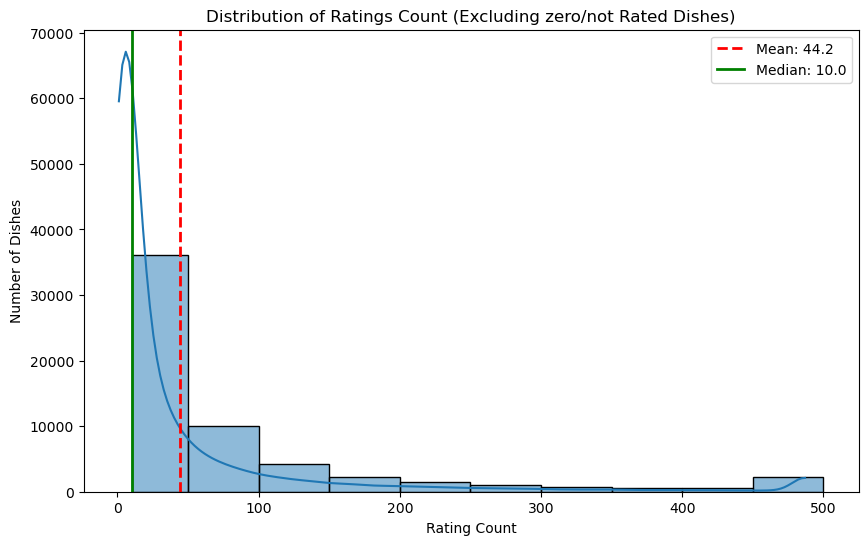

In [41]:
## Rating Count column analysis

# Filtering out Zero Ratings count from the df as it doesnt tell much info.
df_filtered_rc=df[df['Rating Count']>0]

plt.figure(figsize=(10,6))

bins=[10,50,100,150,200,250,300,350,400,450,500]
# Histogram Representing the Rating Count for the Dishes
sns.histplot(df_filtered_rc['Rating Count'],edgecolor='black',kde=True,bins=bins)

# Adding mean and median reference lines
rc_mean=df_filtered_rc['Rating Count'].mean()
rc_median=df_filtered_rc['Rating Count'].median()

# Adding axvlines
plt.axvline(rc_mean,linestyle='--',color='r',linewidth=2,label=f'Mean: {rc_mean:.1f}')
plt.axvline(rc_median,linestyle='-',color='g',linewidth=2,label=f'Median: {rc_median:.1f}')

# Adding Title and labels
plt.xlabel('Rating Count')
plt.ylabel('Number of Dishes')
plt.title('Distribution of Ratings Count (Excluding zero/not Rated Dishes)')
plt.legend()
plt.show()

**We can observe that Rating Counts are purely right skewed showing very few interactions from the customers to rate a particular item**

In [42]:
df_filtered_rc['Rating Count'].min()

1

## `Categorical Variables analysis:`

### Sorting all the categorical columns to get the top 10 Popular categories of each, grouped-by the Ratings count (as more Rating Count --> More Interactions to/from that Category --> Most Popular).

In [43]:
# Not removing Rating count of zero is also fine for popularity analysis as we are aggregating sum of 'Ratings count' , but bad as it cause data-quality issues for few cases.
top_10_states=df[df['Rating Count']>0].groupby(['State'])['Rating Count'].sum().sort_values(ascending=False).head(10)
top_10_states

State
Karnataka        493932
Tamil Nadu       385982
Rajasthan        325890
Delhi            295366
Odisha           292536
Punjab           278346
West Bengal      265914
Telangana        265437
Uttar Pradesh    239802
Maharashtra      212350
Name: Rating Count, dtype: int64

In [44]:
top_10_cities=df[df['Rating Count']>0].groupby(['City'])['Rating Count'].sum().sort_values(ascending=False).head(10)
top_10_cities

City
Bengaluru      493932
Chennai        385982
Jaipur         325890
New Delhi      295366
Bhubaneswar    292536
Chandigarh     278346
Kolkata        265914
Hyderabad      265437
Lucknow        239802
Mumbai         212350
Name: Rating Count, dtype: int64

In [45]:
top_10_restaurants=df[df['Rating Count']>0].groupby(['Restaurant Name'])['Rating Count'].sum().sort_values(ascending=False).head(10)
top_10_restaurants

Restaurant Name
Mcdonald'S                     449728
Kfc                            402004
Burger King                    204317
Pizza Hut                      201120
Domino'S Pizza                 127726
Nic Ice Creams                  69212
Lunchbox - Meals And Thalis     64958
Sangeetha Veg Restaurant        48116
Burger Farm                     46474
La Pino'Z Pizza                 45164
Name: Rating Count, dtype: int64

In [46]:
top_10_dishes=df[df['Rating Count']>0].groupby(['Dish Name'])['Rating Count'].sum().sort_values(ascending=False).head(10)
top_10_dishes

Dish Name
Margherita Pizza                   37890
Masala Dosa                        23199
Medium Fries                       22044
Margherita                         21464
Chicken Fried Rice                 21353
Butter Naan                        20852
Chicken Popcorn - Medium           20756
Paneer Butter Masala               20694
Chicken Zinger Burger - Classic    18460
Veg Fried Rice                     15610
Name: Rating Count, dtype: int64

In [47]:
# Removing Marketing labels to get original category popularity.
categories_clean=df[~df['Category'].isin(['Recommended','Exclusive Deals (Save Upto 40%)'])] 

top_10_categories=categories_clean[categories_clean['Rating Count']>0].groupby(['Category'])['Rating Count'].sum().sort_values(ascending=False).head(10)
top_10_categories

Category
Burgers                         132811
Burgers & Wraps                  82850
Breads                           71929
Snacks                           65785
Desserts                         64977
Main Course                      64488
Sweets                           62197
Veg Pizza                        56775
Hot & Crispy Chicken & Wings     54202
Fries & Sides                    50305
Name: Rating Count, dtype: int64

## `Plotting the top 10 Categories of each Category column`

### `States` where users rated the most dishes, sighting the highest customer engagement on Swiggy.

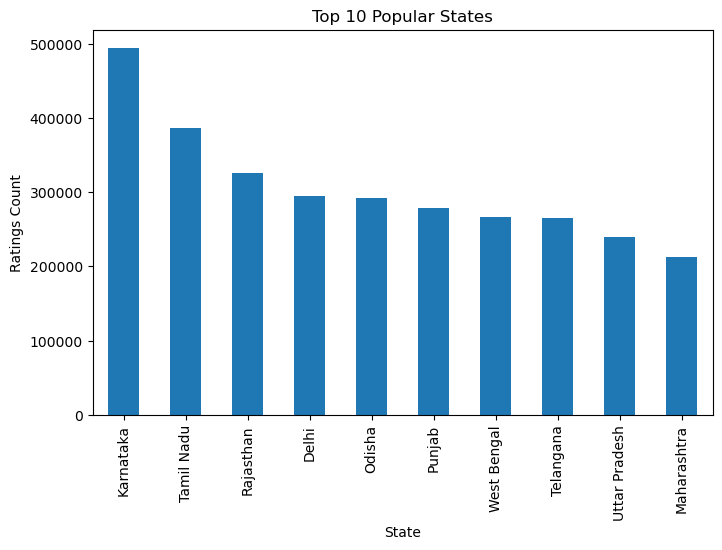

In [48]:
## Top 10 Popular States.
 
top_10_states.plot(kind='bar', figsize=(8,5), title='Top 10 Popular States')
plt.xlabel("State"); plt.ylabel("Ratings Count"); plt.show()


**`Karnataka` Stands in the first place with almost 500000 Customers engaged in the `Swiggy` app, while other 9 states followed by karnataka have atleast 200000 customers engaged on the Swiggy which make these 10 States most popular.**

### Cities with maximum usage of Swiggy (strong delivery market presence).

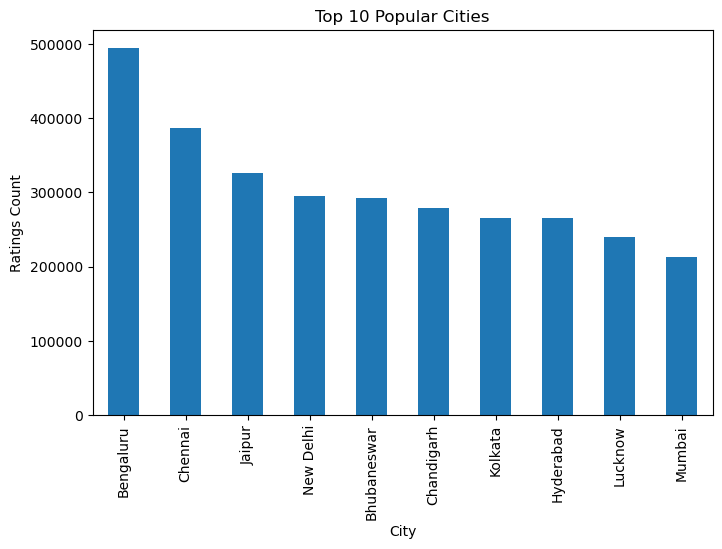

In [49]:
## Top 10 Popular cities.

top_10_cities.plot(kind='bar',figsize=(8,5),title='Top 10 Popular Cities')
plt.xlabel('City');plt.ylabel('Ratings Count');


**`Bengaluru` Stands in the first place with almost 500000 Customers engaged in the `Swiggy` app, while other 9 cities followed by Benguluru have atleast 200000-300000 customers engaged on the Swiggy which make these 10 Cities most popular.**

### Top 10 Popular Restaurants across Swiggy , where customers are most Intrested in.

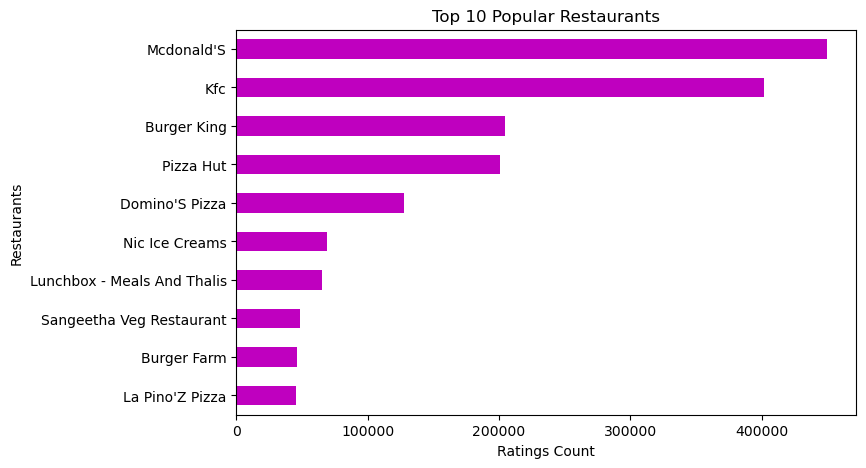

In [50]:
# Top 10 Popular Restaurants.

top_10_restaurants.plot(kind='barh',figsize=(8,5),title='Top 10 Popular Restaurants',color='m')
plt.xlabel('Ratings Count')
plt.ylabel('Restaurants')
plt.gca().invert_yaxis();

**We can Observe `Mcdonald's` and `Kfc` are the most Popular Restaurants with `300000 and above` customers engaged/odered in `Swiggy`, while other 8 restaurants also shows their Popularity with atleast 50000 customer engagement/orders with the restaurants**

### Most Popular Dishes where Customers are Intrested in across the Swiggy.

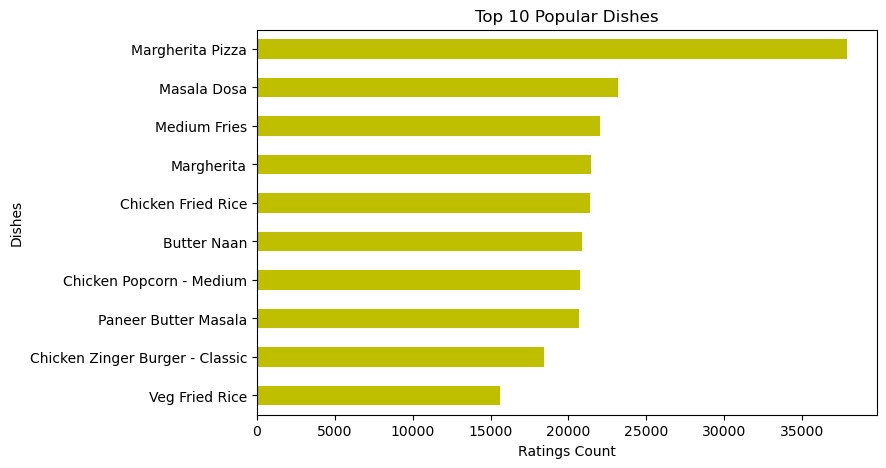

In [51]:
# Top 10 Popular Dishes.

top_10_dishes.plot(kind='barh',figsize=(8,5),title='Top 10 Popular Dishes',color='y')
plt.xlabel('Ratings Count');plt.ylabel('Dishes'),plt.gca().invert_yaxis();


**We can Clearly observe the Domination of the dish `Margherita Pizza` across the `Swiggy` with more than 35000 engagements, which makes it the top dish in the swiggy, meanwhile other popular dishes also have their mark with more than 15000 engagements/orders across Swiggy**

### Most Popular Food Categories across Swiggy (Marketing labels removed → correct cuisine representation)

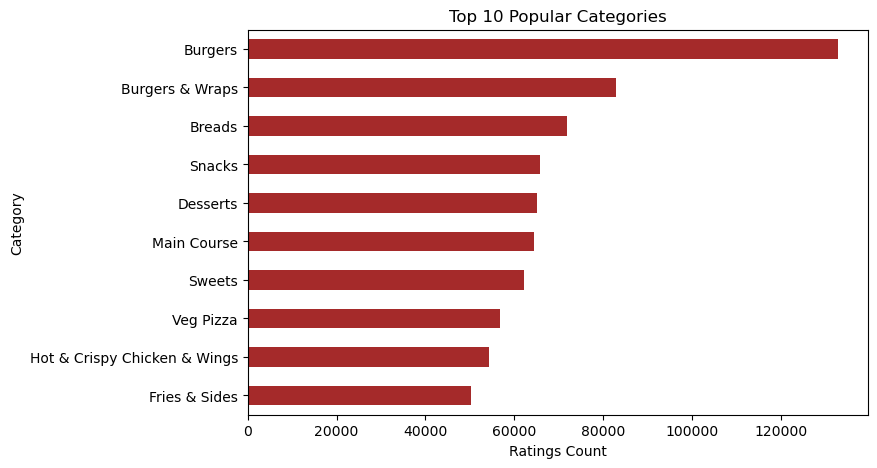

In [52]:
# Barplot for Top 10  Popular Categories.

top_10_categories.plot(kind='barh',figsize=(8,5),title='Top 10 Popular Categories',color='brown')
plt.xlabel('Ratings Count');plt.ylabel('Category'),plt.gca().invert_yaxis();

**We Can Observe that `Brugers` Food Category have heighest engagement overall across `Swiggy` and followed by other popular categories which attracted more than 40000 engagemnets/orders allover.**

### Checking for Dominaant Category and City, allover the Swiggy.

In [53]:
(df['Restaurant Name'].value_counts(normalize=True) * 100).round(2) # checking for dominant Restaurant

Restaurant Name
Mcdonald'S                    6.71
Kfc                           6.38
Burger King                   3.44
Pizza Hut                     3.32
Domino'S Pizza                2.78
                              ... 
The Complete Comfort Zone     0.00
Barq Foods                    0.00
Talk Of The Town (Bt Road)    0.00
Royal Kitchen                 0.00
Anand Sweets & Savouries      0.00
Name: proportion, Length: 984, dtype: float64

In [54]:
(df['Dish Name'].value_counts(normalize=True) * 100).round(2) # checking for dominant Dish

Dish Name
Veg Fried Rice                                           0.17
Choco Lava Cake                                          0.15
Paneer Butter Masala                                     0.14
Jeera Rice                                               0.14
French Fries                                             0.13
                                                         ... 
1 Puri Aloo Dum + 1 Plain Paratha With Aloo Dum          0.00
1 Mushroom Fried Rice + 1 Plain Paratha With Aloo Dum    0.00
Cheese Roll+Corn Roll+Soya Roll                          0.00
Manchurian Fried Rice Combo+Veg Fried Rice               0.00
1 Plain Paratha With Aloo Dum + 1 Taipo [1 Piece]        0.00
Name: proportion, Length: 53722, dtype: float64

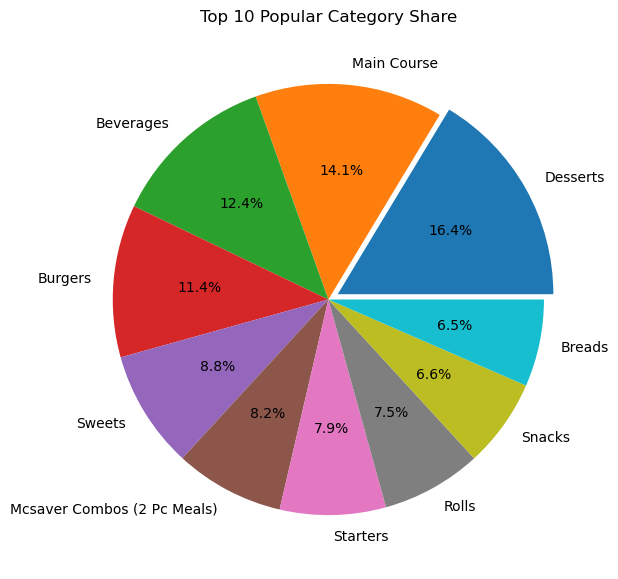

In [55]:
# checking for dominant Category, all over the data.
explode=[0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
categories_clean['Category'].value_counts().head(10).plot.pie(autopct='%1.1f%%', figsize=(7,7),explode=explode)
plt.title("Top 10 Popular Category Share")
plt.ylabel("")
plt.show()


**We can clearly Observe that people who uses Swiggy have little extra intrest on Desserts, and hence it is most dominant category on Swiggy**

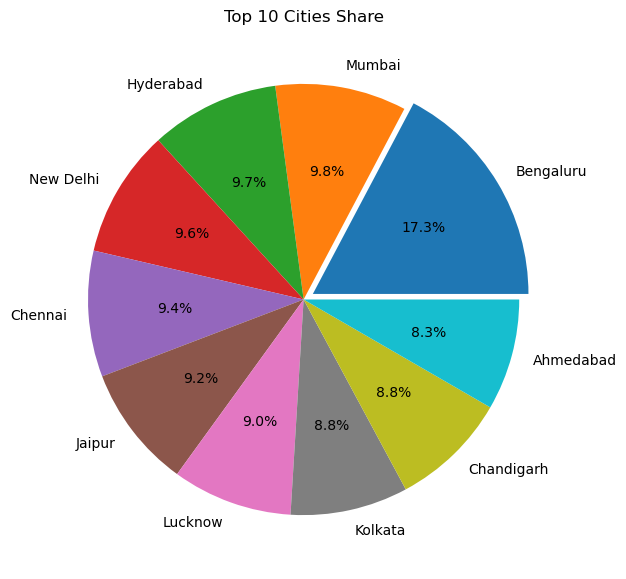

In [92]:
# checking for dominant City, allover the data.
explode=[0.05,0,0,0,0,0,0,0,0,0]
df['City'].value_counts().head(10).plot.pie(autopct='%1.1f%%',figsize=(7,7),title='Top 10 Cities Share',explode=explode)
plt.ylabel('');

**We can clearly see that most people who often uses Swiggy are from Bengaluru**

## `Plotting 2 or more columns for better Analysis of the Data:`

In [57]:
df.columns

Index(['State', 'City', 'Restaurant Name', 'Location', 'Category', 'Dish Name',
       'Price (INR)', 'Rating', 'Rating Count'],
      dtype='object')

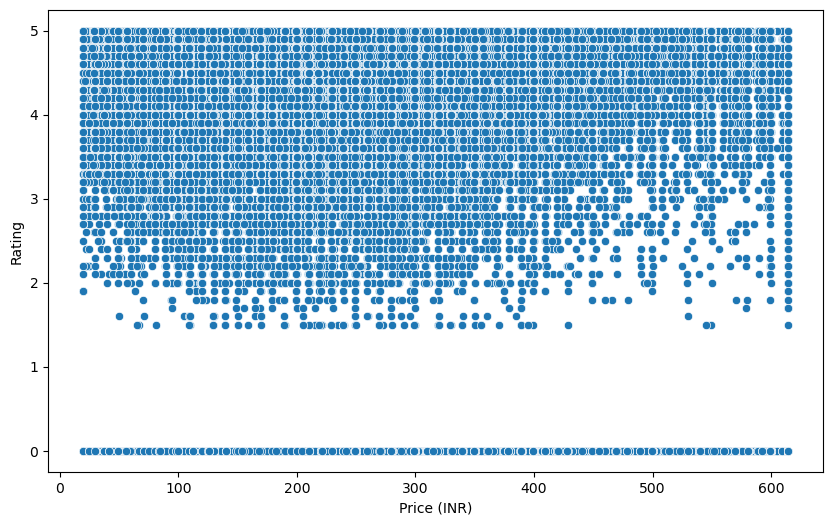

In [91]:
# Price vs rating (cont Num vs cont Num)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Price (INR)',y='Rating');

**We can see that Price doesnt influence the customer rating, customer choosed to rate whatever item they liked , not believing greater the price --> better the quality of item would be.**

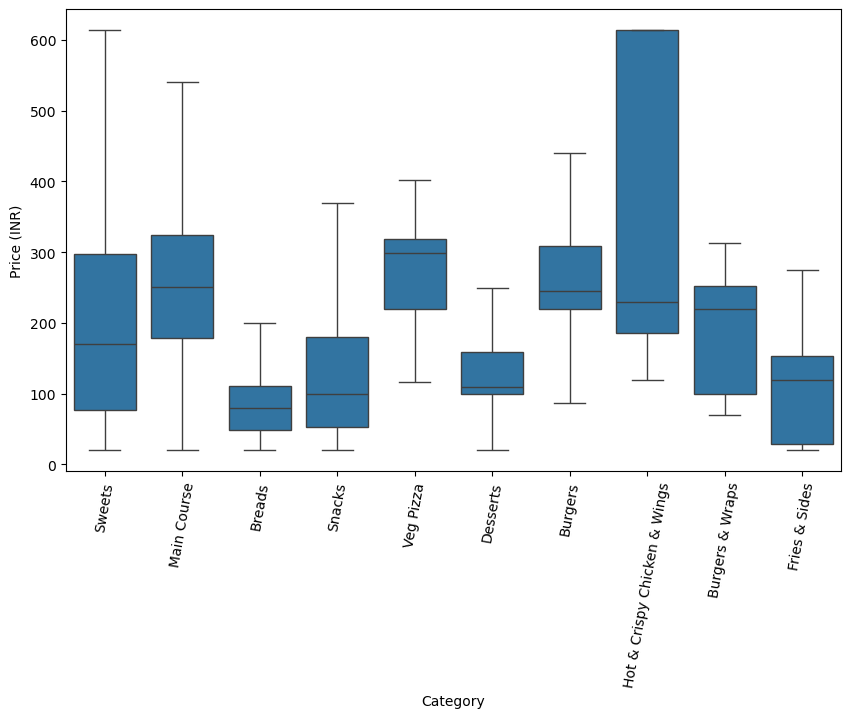

In [89]:
# Category vs price (cat vs contunious num)
plt.figure(figsize=(10,6))
category_filtered=df[df['Category'].isin(top_10_categories.index)]
sns.boxplot(data=category_filtered,x='Category',y='Price (INR)',showfliers=False)
plt.xticks(rotation=80);

**We can observe that the most expensive category allover is the "veg pizza" beased on its median Price.**

In [60]:
category_filtered.groupby('Category')['Price (INR)'].agg(Mean='mean',Median='median').sort_values('Median',ascending=False)

,Mean,Median
Category,,
Veg Pizza,283.607379,299.00
Main Course,256.504535,250.00
Burgers,272.264718,244.80
Hot & Crispy Chicken & Wings,371.629148,230.00
Burgers & Wraps,191.319109,219.04
Sweets,214.370429,170.00
Fries & Sides,116.754911,119.00
Desserts,140.008325,109.00
Snacks,126.899401,100.00


In [61]:
price_stats = category_filtered.groupby('Category')['Price (INR)'].describe()[['50%', 'mean', 'min', 'max']]
print(price_stats)


                                 50%        mean    min     max
Category                                                       
Breads                         79.00   85.218447   20.0  360.00
Burgers                       244.80  272.264718   20.0  614.00
Burgers & Wraps               219.04  191.319109   70.0  313.33
Desserts                      109.00  140.008325   20.0  614.00
Fries & Sides                 119.00  116.754911   20.0  445.97
Hot & Crispy Chicken & Wings  230.00  371.629148  119.0  614.00
Main Course                   250.00  256.504535   20.0  614.00
Snacks                        100.00  126.899401   20.0  614.00
Sweets                        170.00  214.370429   20.0  614.00
Veg Pizza                     299.00  283.607379  116.0  614.00


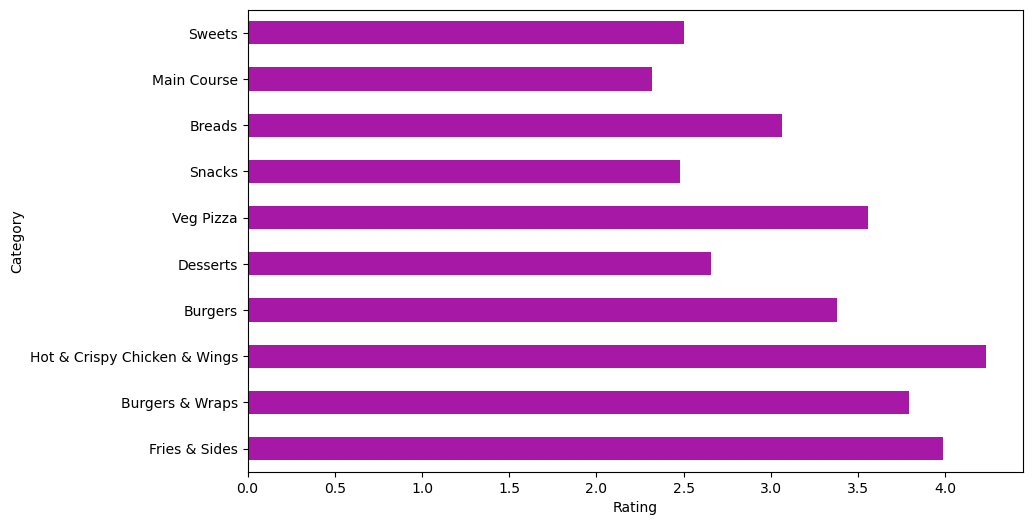

In [90]:
# Category vs Rating (cat vs descrete num)
plt.figure(figsize=(10,6))

sns.barplot(data=category_filtered,y='Category',x='Rating',errorbar=None,width=0.5,color='m'); # by default calculates the average ratings.

**It is clearly visisble that "Hot & Crispy Chicken & Wings" have the best overall average ratings compared to all other categories on swiggy**

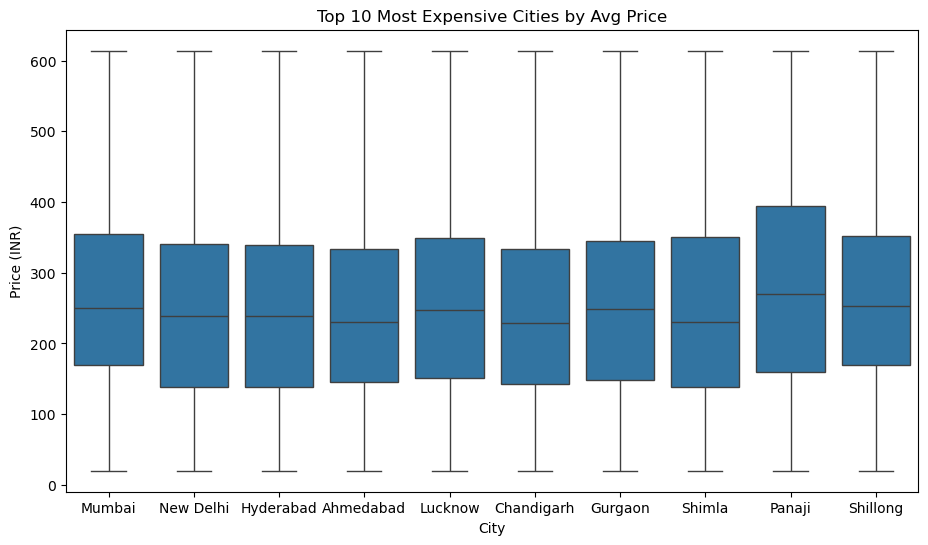

In [93]:
# City vs Price (cat vs contunious num)
# Top 10 most expensive Cities

plt.figure(figsize=(11,6))

expensive_cities=df.groupby('City')['Price (INR)'].mean().sort_values(ascending=False)
expensive_index=expensive_cities.head(10).index
expensive_filtered=df[df['City'].isin(expensive_index)]

sns.boxplot(data=expensive_filtered,x='City',y='Price (INR)',showfliers=False)
plt.title('Top 10 Most Expensive Cities by Avg Price');

**We can refer the top 10 Expensive cities based on the "Average Prices" of the items from the above.**

Text(0.5, 1.0, 'Top 10 Cheapest Cities by Avg Price')

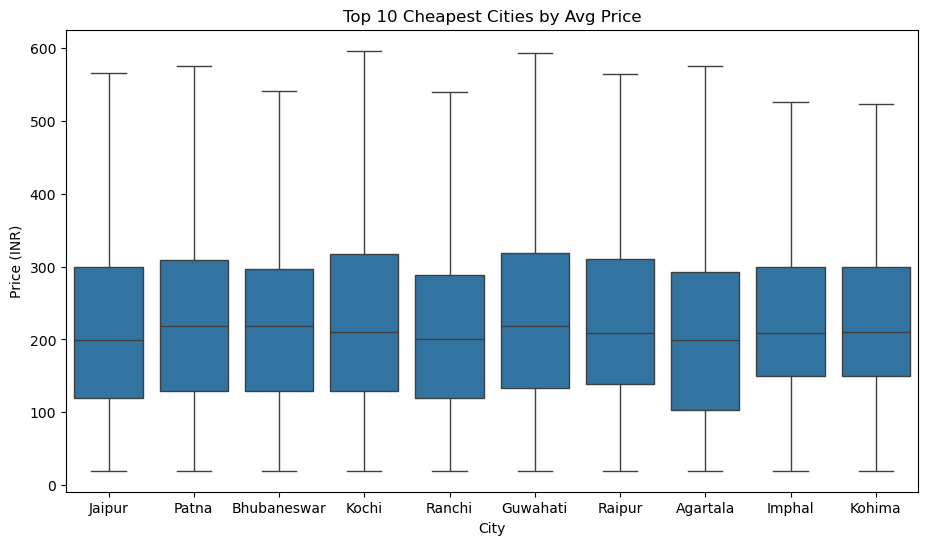

In [64]:
# Top 10 most Cheapest Cities

plt.figure(figsize=(11,6))

cheap_cities=df.groupby('City')['Price (INR)'].mean().sort_values(ascending=False)
cheap_index=expensive_cities.tail(10).index
cheap_filtered=df[df['City'].isin(cheap_index)]

sns.boxplot(data=cheap_filtered,x='City',y='Price (INR)',showfliers=False)
plt.title('Top 10 Cheapest Cities by Avg Price')


**We can refer the top 10 Cheapest cities based on the "Average Prices" of the items from the above.**

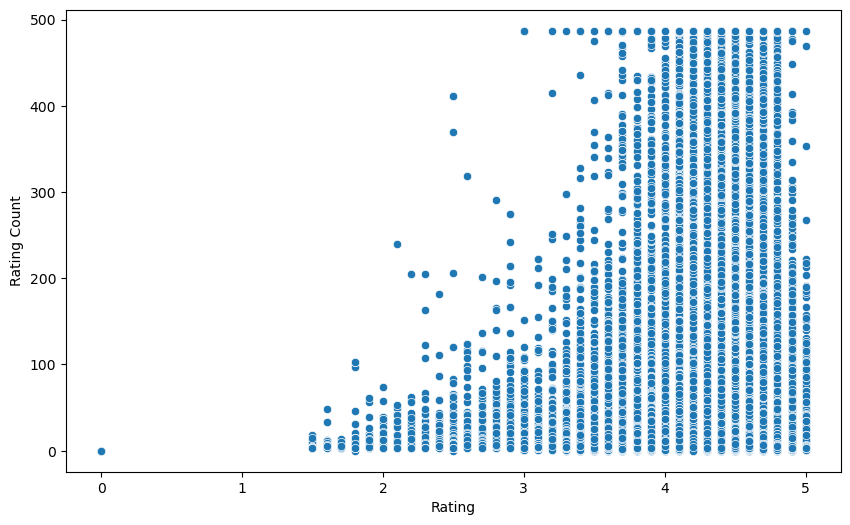

In [65]:
# Rating Count vs Rating
# Checking wether popular dishes (with more reviews) rated higher or lower than average

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, y='Rating Count', x='Rating');

**Popular dishes (with more reviews) are mostly rated higher than average, showing that customers prefer well-rated dishes and engage more with them.**

In [94]:
# City × Category × Price
# Creating a pivot table: cities (rows), categories (columns), median price (values).

pivot_table_for_price = category_filtered.pivot_table(
    index='City',
    columns='Category',
    values='Price (INR)',
    aggfunc='median'
)
pivot_table_for_price=pivot_table_for_price.fillna(0)
pivot_table_for_price.head()

Category,Breads,Burgers,Burgers & Wraps,Desserts,Fries & Sides,Hot & Crispy Chicken & Wings,Main Course,Snacks,Sweets,Veg Pizza
City,,,,,,,,,,
Agartala,75.0,270.9,0.00,103.81,0.00,366.440,85.0,80.0,20.00,309.0
Ahmedabad,137.5,249.0,219.04,109.00,115.95,339.045,540.0,100.0,0.00,319.0
Aizawl,99.5,260.0,0.00,157.00,0.00,366.440,300.0,197.5,0.00,289.0
Bengaluru,75.0,249.0,200.00,109.00,111.00,339.500,212.5,65.0,146.67,319.0
Bhubaneswar,62.0,239.0,0.00,119.00,0.00,339.500,244.0,99.0,87.50,289.0


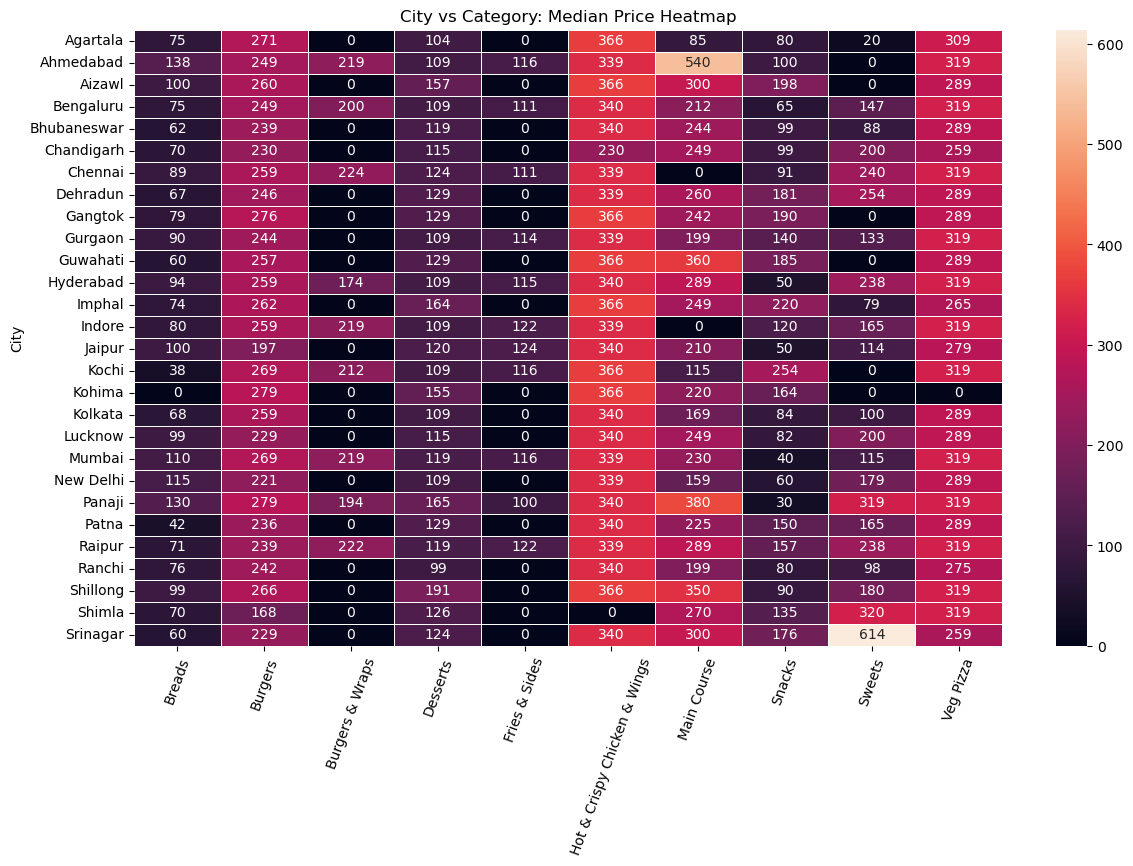

In [102]:
# Heatmap to visualize the above Pivot Table.

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table_for_price, annot=True, fmt=".0f", linewidths=.5)

plt.title("City vs Category: Median Price Heatmap")
plt.xlabel("")
plt.ylabel("City")
plt.xticks(rotation=70)
plt.show()


**We can observe that the heat map highlights the main courses and hot & crispy items as most expensive, while burgers, snacks and breads tend to be cheaper across cities.**

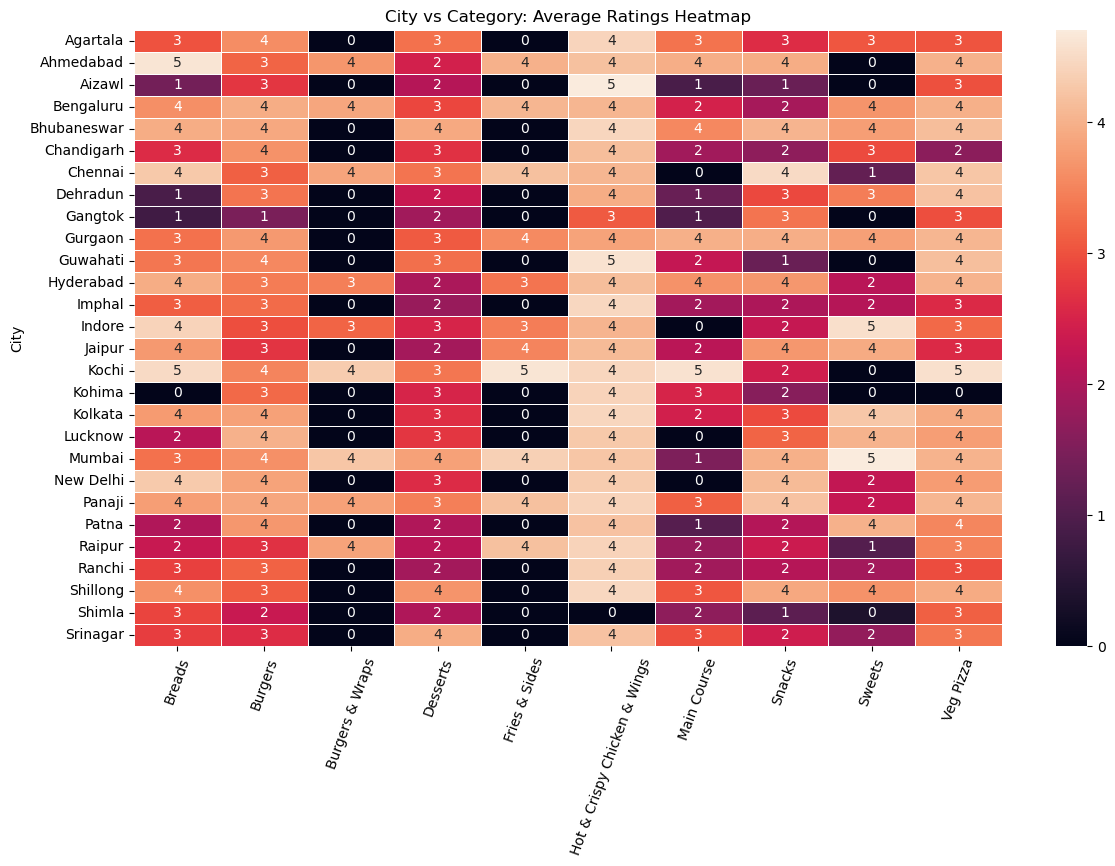

In [105]:
# City × Category × Rating

pivot_table_for_rating=category_filtered.pivot_table(
    index='City',
    columns='Category',
    values='Rating',
    aggfunc='mean'
)

pivot_table_for_rating=pivot_table_for_rating.fillna(0)

# Heat map
plt.figure(figsize=(14, 8))

sns.heatmap(pivot_table_for_rating, annot=True, fmt=".0f", linewidths=.5)

plt.title("City vs Category: Average Ratings Heatmap")
plt.xlabel("")
plt.xticks(rotation=70)
plt.ylabel("City")
plt.show()

**This heatmap shows the average customer ratings across food categories in different Indian cities, indicating that Breads, Hot & Crispy items, and Main Course generally receive higher ratings, while Desserts and Snacks show more variation in quality across cities.**

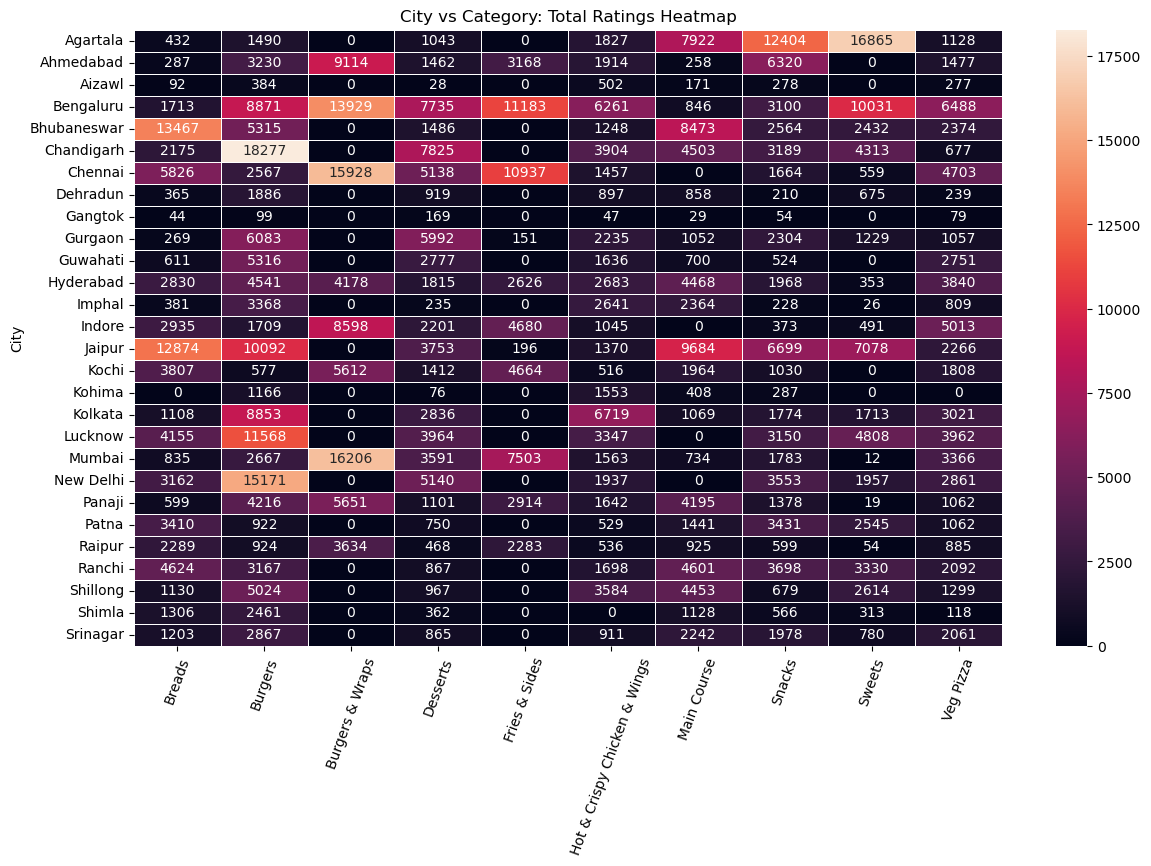

In [106]:
# City × Category × Ratings count
# To Know which city–category combinations have the highest ratings?

pivot_table_for_rating_count=category_filtered.pivot_table(
    index='City',
    columns='Category',
    values='Rating Count',
    aggfunc='sum'
)

pivot_table_for_rating_count=pivot_table_for_rating_count.fillna(0)

# Heat map
plt.figure(figsize=(14, 8))

sns.heatmap(pivot_table_for_rating_count, annot=True, fmt=".0f", linewidths=.5)

plt.title("City vs Category: Total Ratings Heatmap")
plt.xlabel("")
plt.xticks(rotation=70)
plt.ylabel("City")
plt.show()

**This heatmap displays the total number of ratings received by each food category across Indian cities, showing that Burgers, Main Course, and Hot & Crispy Chicken & Wings attract the highest consumer engagement, while Desserts and Veg Pizza receive comparatively fewer ratings.**

In [70]:
city_wise_num_of_items=df.groupby(['City'])['Dish Name'].count()
city_wise_num_of_items

City
Agartala        4947
Ahmedabad       8867
Aizawl          3031
Bengaluru      18349
Bhubaneswar     5018
Chandigarh      9358
Chennai        10042
Dehradun        5084
Gangtok         2105
Gurgaon         5005
Guwahati        5032
Hyderabad      10279
Imphal          5001
Indore          7114
Jaipur          9801
Kochi           5029
Kohima          2286
Kolkata         9381
Lucknow         9581
Mumbai         10467
New Delhi      10183
Panaji          5030
Patna           5000
Raipur          5025
Ranchi          5100
Shillong        5183
Shimla          5054
Srinagar        4974
Name: Dish Name, dtype: int64

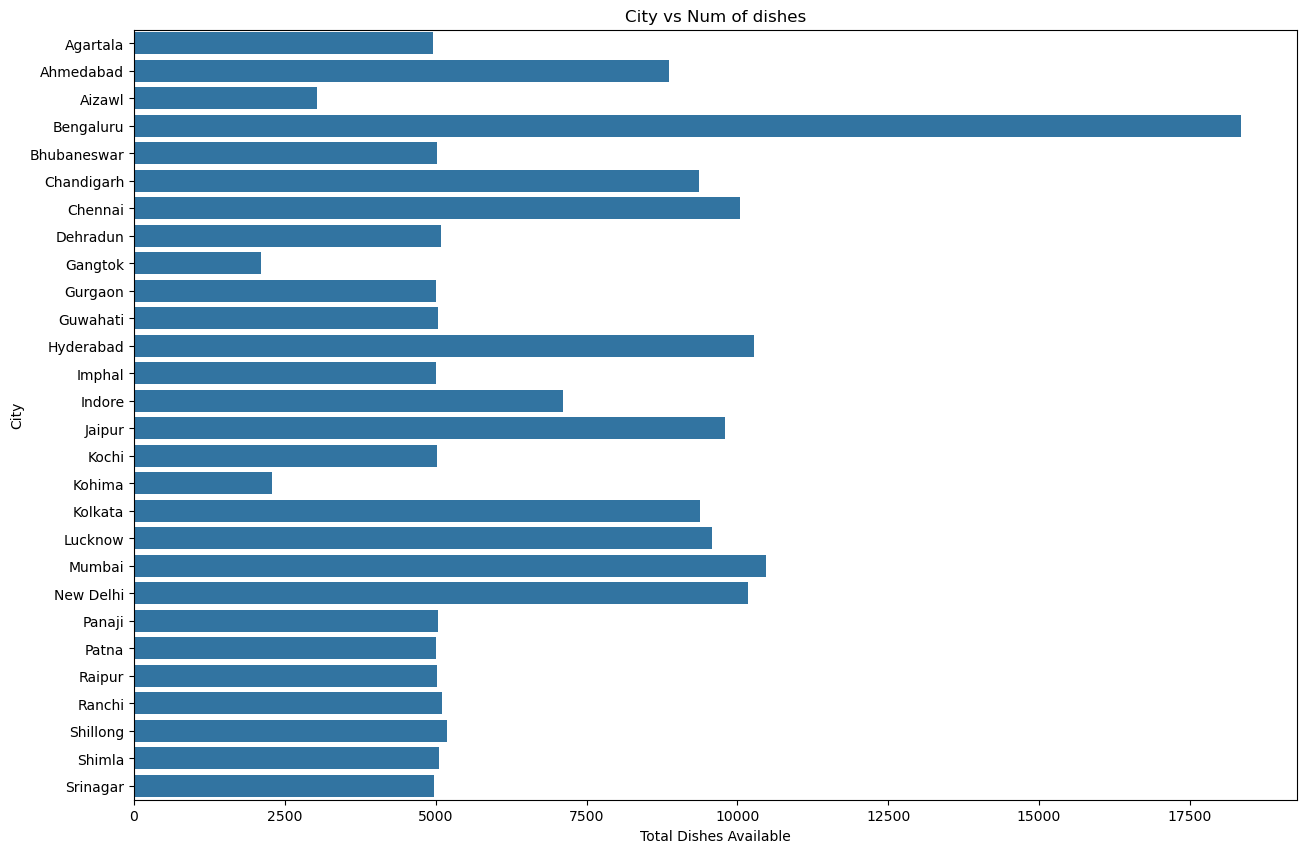

In [71]:
# State/City × Number of Items
# Checking which states or cities dominate in terms of menu items.


plt.figure(figsize=(15, 10))
sns.barplot(x=city_wise_num_of_items.values,y=city_wise_num_of_items.index)
plt.title("City vs Num of dishes")
plt.xlabel("Total Dishes Available")
plt.ylabel("City")
plt.show()


**We can clearly observe the domination of "Bengaluru" in having the large number of dish items in the menu, while "Kohima,Gangtok,Aizawl" have lesser Dish items in the swiggy menu when compared to all other cities**

In [72]:
# Restaurant × Category × Rating and Price
# Comparing top restaurants across categories.

category_restaurants_filtered=df[(df['Category'].isin(top_10_categories.index)) & (df['Restaurant Name'].isin(top_10_restaurants.index))]

category_restaurants_filtered['Restaurant Name'].nunique(), category_restaurants_filtered['Category'].nunique()

(7, 8)

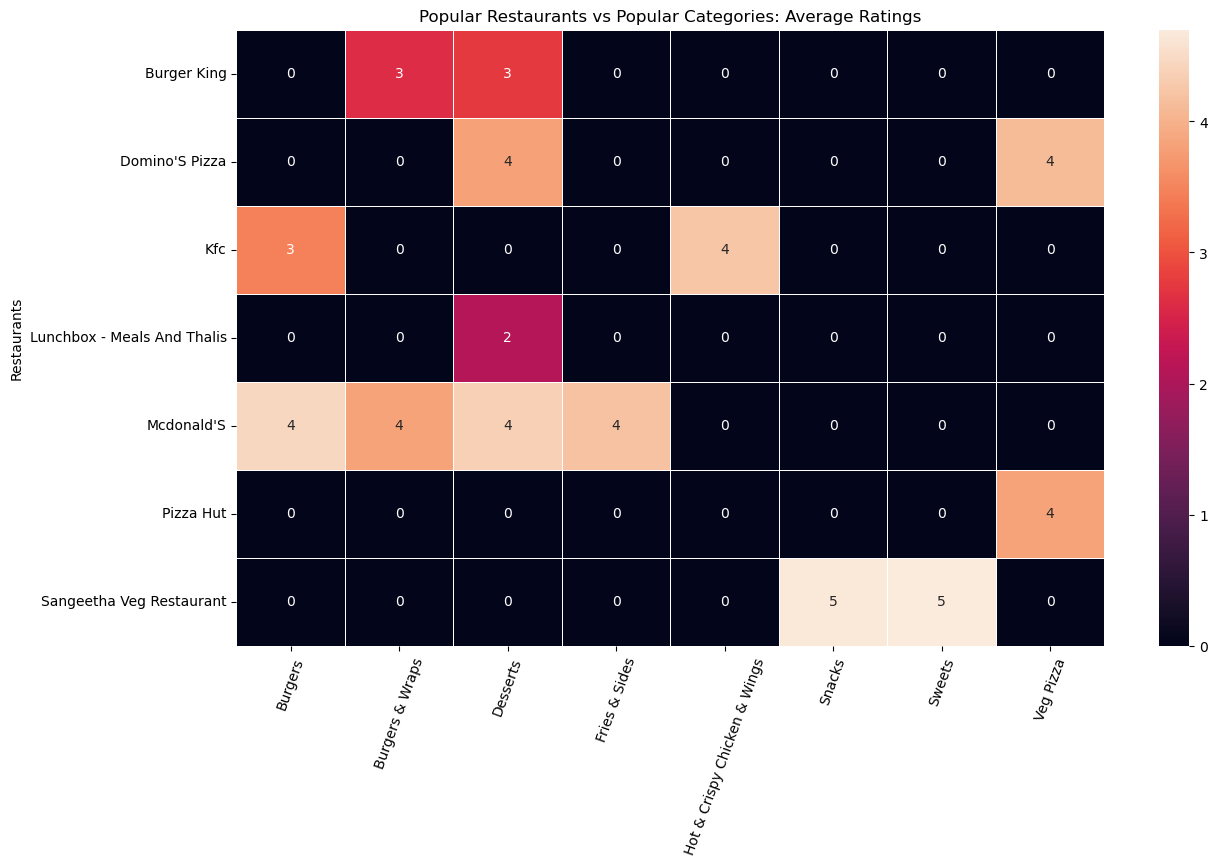

In [107]:
pivot_table_for_top10category_best_restaurants_based_on_ratings = category_restaurants_filtered.pivot_table(
    index='Restaurant Name',
    columns='Category',
    values='Rating',
    aggfunc='mean'
)

pivot_table_for_top10category_best_restaurants_based_on_ratings = pivot_table_for_top10category_best_restaurants_based_on_ratings.fillna(0)

# Heat map
plt.figure(figsize=(14, 8))

sns.heatmap(pivot_table_for_top10category_best_restaurants_based_on_ratings, annot=True, fmt=".0f", linewidths=.5)

plt.title("Popular Restaurants vs Popular Categories: Average Ratings")
plt.xlabel("")
plt.xticks(rotation=70)
plt.ylabel("Restaurants")
plt.show()


**This heatmap compares average ratings of popular food categories across top restaurant chains, showing that McDonald's is consistently well-rated across multiple categories, Sangeetha Veg Restaurant performs best in Snacks and Sweets, while chains like Burger King and Lunchbox have more limited but category-specific strengths.**

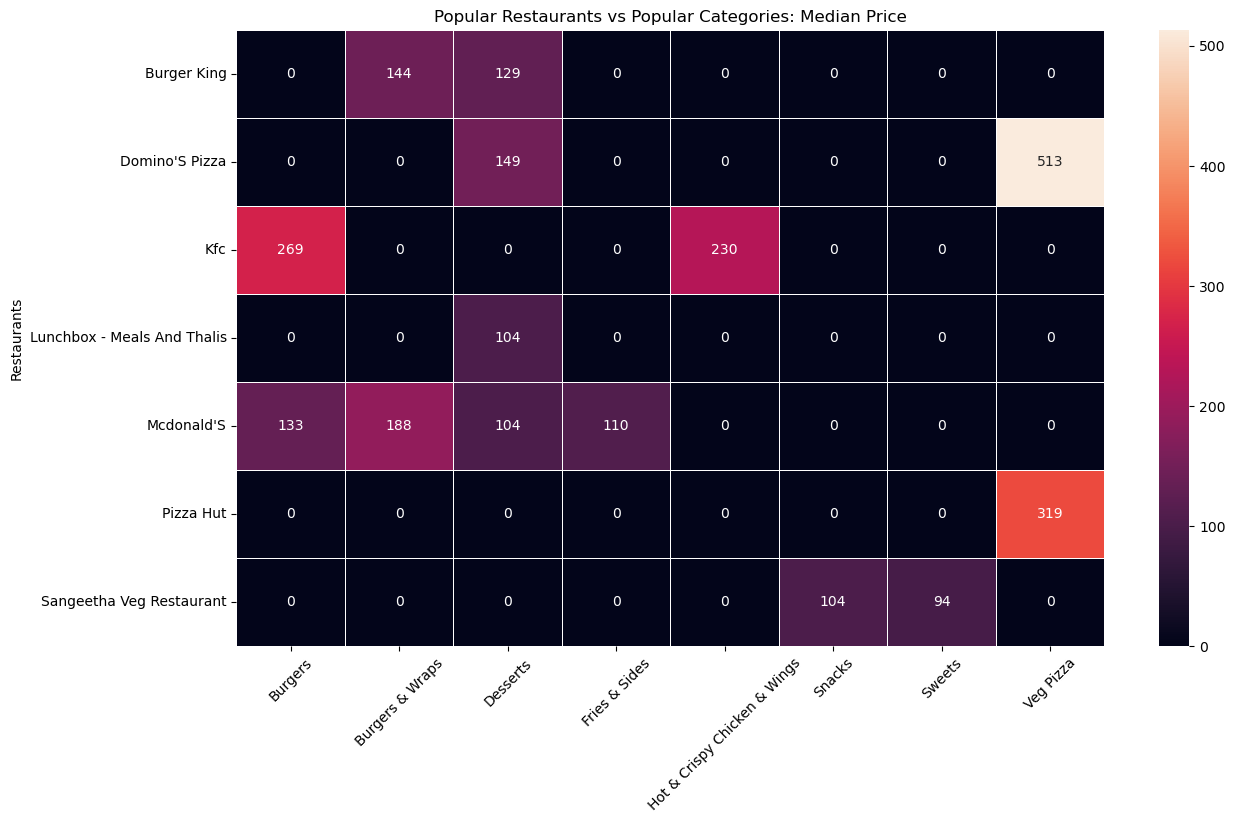

In [108]:
pivot_table_for_top10category_best_restaurants_based_on_price = category_restaurants_filtered.pivot_table(
    index='Restaurant Name',
    columns='Category',
    values='Price (INR)',
    aggfunc='median'
)

pivot_table_for_top10category_best_restaurants_based_on_price = pivot_table_for_top10category_best_restaurants_based_on_price.fillna(0)

# Heat map
plt.figure(figsize=(14, 8))

sns.heatmap(pivot_table_for_top10category_best_restaurants_based_on_price, annot=True, fmt=".0f", linewidths=.5)

plt.title("Popular Restaurants vs Popular Categories: Median Price")
plt.xlabel("")
plt.xticks(rotation=70)
plt.ylabel("Restaurants")
plt.xticks(rotation=45)
plt.show()



**This heatmap compares median prices of food categories across popular restaurant chains, showing that KFC and Domino’s are on the costlier side for Burgers and Veg Pizza respectively, while McDonald’s offers relatively affordable options across multiple categories, and Sangeetha Veg Restaurant focuses on low-priced Snacks and Sweets.**

## Final Analysis:

### Category Insights
**Which categories have the highest average/median price?**

In [76]:
df.groupby('Category')['Price (INR)'].agg(Average_Price='mean',Median_Price='median',Count='count').round().sort_values('Average_Price',ascending=False).head(10)

,Average_Price,Median_Price,Count
Category,,,
56 Bhog,614.0,614.0,1
1/2 Kg Cakes,614.0,614.0,4
500 Gm French Cakes,614.0,614.0,3
1Kg Regular Cake,614.0,614.0,5
1Kg Eggless Cake,614.0,614.0,1
Pasta & Pizza,614.0,614.0,6
Party Menu For 10Pax,614.0,614.0,2
Party Specials,614.0,614.0,6
Bucket & Box Biriyani,614.0,614.0,6


**Which categories are rated the best on average?**

In [77]:
rating_insights = df.groupby('Category').agg(
    
    Avg_Rating=('Rating', 'mean'),
    Total_Ratings=('Rating Count', 'sum')
    
).sort_values(by='Avg_Rating', ascending=False).head(20)

rating_insights


,Avg_Rating,Total_Ratings
Category,,
Add-Ons,5.000,4
1Kg Eggless Cake,5.000,5
Strarters,5.000,6
Egg Deluxe Thali,5.000,3
Appam,5.000,4
Nag Panchami Specials,5.000,13
Tandoori And Fry Non Veg,5.000,13
Tandoori Platter,5.000,3
Mini Combos,5.000,3


## City Insights


**Which cities have the best-rated dishes?**

In [109]:
df[df['Rating'] > 0].groupby('City')['Rating'].mean().sort_values(ascending=False).head()

City
Kochi        4.464463
Aizawl       4.429383
Kolkata      4.414052
Ahmedabad    4.378273
Panaji       4.377465
Name: Rating, dtype: float64

## State-Level Insights
**Comparing average prices and ratings across states.**

In [79]:
df.groupby(['State']).agg(
    
    Average_price=('Price (INR)','mean'),
     Average_rating=('Rating','mean')
    
).sort_values('Average_rating',ascending=False).round(1)

,Average_price,Average_rating
State,,
Odisha,229.4,3.4
Haryana,268.4,3.2
Tamil Nadu,247.4,3.1
Kerala,238.1,3.0
West Bengal,252.5,3.0
Meghalaya,269.0,3.0
Maharashtra,272.2,2.9
Karnataka,252.3,2.9
Goa,290.1,2.8


**Which states are “premium” vs “budget” based on pricing?**

In [116]:
# 1. Average price per state
state_price = df.groupby('State')['Price (INR)'].mean().to_frame('Avg_Price')

# 2. Find overall median of state average prices
price_median = state_price['Avg_Price'].median()

# 3. Categorize states
state_price['Price_Category'] = np.where(state_price['Avg_Price'] >= price_median,
                                         'Premium Market',
                                         'Budget Market')

state_price=state_price.sort_values('Avg_Price', ascending=False)

state_price.head()


,Avg_Price,Price_Category
State,,
Goa,290.083008,Premium Market
Maharashtra,272.223665,Premium Market
Uttar Pradesh,272.137815,Premium Market
Meghalaya,269.001366,Premium Market
Haryana,268.431425,Premium Market


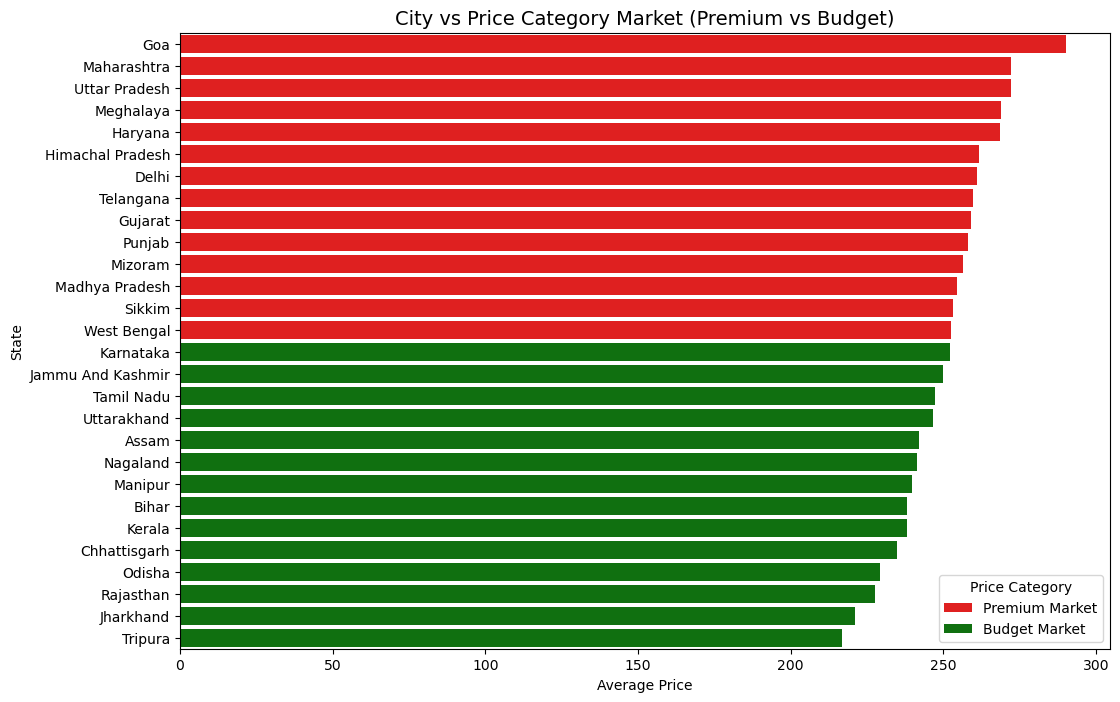

In [117]:
plt.figure(figsize=(12, 8))
sns.barplot(data=state_price, x='Avg_Price', y='State', hue='Price_Category', palette=['red','green'])

plt.title('City vs Price Category Market (Premium vs Budget)', fontsize=14)
plt.xlabel('Average Price')
plt.ylabel('State')
plt.legend(title='Price Category')
plt.show()

## Popularity

**Which category is most popular in terms of rating counts?**

In [81]:
category_filtered.groupby(['Category'])['Rating Count'].sum().sort_values(ascending=False).head(1) # refer to category univariate plot.

Category
Burgers    132811
Name: Rating Count, dtype: int64

### Restaurant Insights


**Which restaurants are known for highly rated dishes?**

In [83]:
high_rated = df[df['Rating'] > 0].groupby('Restaurant Name')['Rating'].mean().sort_values(ascending=False)
high_rated.head(10)

Restaurant Name
Biggies Burger                         5.000000
Krispy Kreme - Doughnuts & Coffee      5.000000
Apna Cafe                              5.000000
Puneet Misthan Bhandar                 5.000000
Sakana                                 4.881707
Vijay Dairy                            4.833333
Izumi                                  4.833333
Cake Hut                               4.828571
Myfroyoland - Premium Frozen Yogurt    4.825000
Baskin Robbins Happyness Shakes        4.800000
Name: Rating, dtype: float64

### Combined Analysis:

**Which Category is dominant in each City?**

In [110]:
dominant_category = category_filtered.groupby(['City','Category'])['Dish Name'].count().reset_index()

# Finding the location of highest num of dishes in particular category from each city.
dominant_category = dominant_category.loc[dominant_category.groupby('City')['Dish Name'].idxmax()] 

dominant_category.sort_values('Dish Name', ascending=False).head()


,City,Category,Dish Name
27,Bengaluru,Desserts,522
93,Hyderabad,Desserts,386
6,Agartala,Sweets,301
223,Shimla,Sweets,287
104,Imphal,Main Course,275


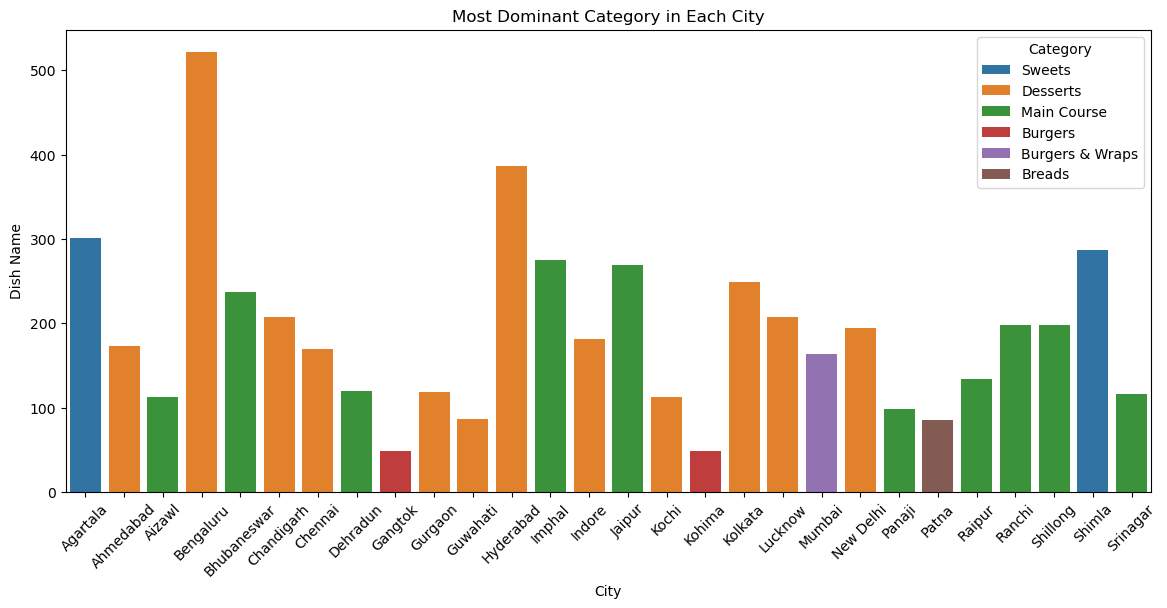

In [111]:
plt.figure(figsize=(14,6))

sns.barplot(data=dominant_category, x='City', y='Dish Name', hue='Category')

plt.title("Most Dominant Category in Each City")
plt.xticks(rotation=45)
plt.show()


**We can refer to all the Dominant Categories in all the respected Cities from the above.**

# <span style="color:red;font-weight:bold;">Final Swiggy Menu Insights & Business Recommendation Report:</span>

### Dataset Context
This analysis explores:
- Food items sold on Swiggy across major Indian cities  
- Category-wise pricing, average ratings, total ratings  
- Performance of popular restaurant chains  

---

## 1) City-Level Insights

| Observation | Implication |
|-------------|-------------|
| **Main Course, Hot & Crispy, Burgers receive highest total ratings** | Customers prefer filling & fast-food meals |
| **Metro cities (Bengaluru, Mumbai, Kolkata, Delhi) lead in engagement** | Strong adoption of online food ordering |
| **Desserts & Veg Pizza show low engagement & rating inconsistency** | Lower demand or poor value pricing |

**Key Takeaway:**  
Fast food & Main Course drive Swiggy’s online orders.

---

## 2) Ratings Insights

| Insight | Interpretation |
|--------|----------------|
| **Breads, Hot & Crispy, Main Course have higher ratings** | These categories offer more customer satisfaction |
| **Snacks & Desserts vary widely by city** | Regional taste influences rating |
| **Chains with focused menus perform better** | Limited specialization beats large menus |

**Key Takeaway:**  
Restaurants with **small, specialized menus receive more 4+ ratings.**

---

## 3) Price Insights

| Category Insight | Interpretation |
|------------------|----------------|
| **Domino’s & Pizza Hut charge premium for Veg Pizza** | Brand value drives higher pricing |
| **KFC dominates Burgers & Fried categories with premium pricing** | High demand tolerates cost |
| **McDonald’s maintains moderate cost with high ratings** | Best value for customers |

**Key Takeaway:**  
**Balanced pricing + specialization = customer loyalty.**

---

## 4) Popular Chain-Level Insights

| Restaurant | Strength |
|------------|----------|
| **McDonald’s** | Strong ratings + value pricing across many categories |
| **KFC** | Best in Fried & Burger categories with premium pricing |
| **Domino’s & Pizza Hut** | High dominance in Veg Pizza but expensive |
| **Sangeetha Veg Restaurant** | Regional strength in Sweets & Snacks |

**Key Takeaway:**  
Top-performing chains focus on **only a few strong categories.**

---

# <span style="color:yellow; font-weight:bold;"> Recommendations for Restaurants to Grow via Swiggy</span>

### A) Focus on High-Engagement Categories
Prioritize:
- **Burgers**
- **Hot & Crispy / Fried Foods**
- **Main Course/Thalis**

---

### B) Improve Value Perception
- Add **₹99/₹149/₹199 price-point items**
- Introduce **combo offers** (Burger + Fries + Drink)

---

### C) Maintain Ratings Above 4.
How to achieve:
- Smaller but specialized menu
- Realistic item descriptions
- Proper packaging (critical for fried foods)

---

### D) Use Regional Strength
For cities with strong local preference:
- Focus on **regional snacks, sweets, ethnic meals**
- Use **authentic names** in titles
- Provide **value pricing**

---

# <span style="color:yellow;font-weight:bold;">Recommendations for Swiggy (Business Strategy)</span>

### 1) Personalized Category Promotions
Examples:
- **“Top Rated Burgers Near You”**
- **“Best Fried Meals in Your Locality”**

---

### 2) Dynamic Discounts for Weak Categories
Categories: **Desserts, Sweets**
- Time-based promos (late-night dessert offers)
- Add-on discount: ₹49 Sweet Add-on with Meals

---

### 3) Push Combos to Increase Order Value
Suggested Combos:
- **Burger + Fries + Coke**
- **Thali + Mini Desert**
- **Family Pizza Packs**

---

### 4) Introduce Trust Badges
Show badges such as:
- *Highly Rated in Burgers*
- *Best Rated Thali in the City*
- *Top Rated Fried Snacks*

---

### 5) Market Segmentation by City
| City Type | Strategy |
|----------|----------|
| **Metro Cities** | Premium promotion + category expansion |
| **Tier 2 & 3 Cities** | Budget combos + free delivery offers |
